In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/dataset_regression.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.isnull().sum().sum()

0

In [16]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,0,0,1,0,190000,2010,0,0,0,2.5,...,1,1,1,0,1,0,1,1,1,16
1,0,0,1,1,290000,2002,0,0,0,3.0,...,1,0,0,1,1,0,0,0,1,83
2,0,1,1,2,402000,2001,0,0,0,2.5,...,1,0,0,0,0,0,0,1,1,151
3,0,2,0,1,10000,1999,0,0,0,3.0,...,0,0,0,0,0,0,0,0,0,86
4,0,3,1,3,280000,2001,0,0,0,2.5,...,1,0,1,1,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,54,1108,1,0,290000,2000,0,0,0,3.5,...,1,0,0,1,1,0,0,1,1,301
38527,54,1111,0,1,321000,2004,2,0,1,2.2,...,1,0,0,1,1,0,0,1,1,317
38528,54,1108,1,1,777957,2000,0,0,0,3.5,...,1,0,0,1,1,0,0,1,1,369
38529,54,1111,0,3,20000,2001,0,0,0,2.0,...,1,0,0,0,0,0,0,0,1,490


In [15]:
df.describe()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
count,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.00000,38531.000000,...,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,29.699359,512.390776,0.334743,3.359139,248864.638447,2002.943734,0.722898,0.034959,0.33464,2.055161,...,0.607199,0.223820,0.275804,0.241468,0.356077,0.170979,0.263736,0.415328,0.579404,80.577249
std,15.211045,299.796376,0.471907,2.728174,136072.376530,8.065731,0.954403,0.183678,0.47242,0.671091,...,0.488379,0.416808,0.446924,0.427979,0.478845,0.376496,0.440663,0.492785,0.493661,112.826569
min,0.000000,0.000000,0.000000,0.000000,0.000000,1942.000000,0.000000,0.000000,0.00000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,309.000000,0.000000,1.000000,158000.000000,1998.000000,0.000000,0.000000,0.00000,1.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,26.000000,449.000000,0.000000,3.000000,250000.000000,2003.000000,0.000000,0.000000,0.00000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59.000000
75%,43.000000,781.000000,1.000000,5.000000,325000.000000,2009.000000,2.000000,0.000000,1.00000,2.300000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,91.000000
max,54.000000,1117.000000,1.000000,11.000000,1000000.000000,2019.000000,5.000000,1.000000,2.00000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2232.000000


In [3]:
y = df["price_usd"]
X = df.drop(["price_usd"], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [5]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [6]:
# print(f'MAE: {mean_absolute_error(y_test[0:10000], y_pred)}')
# print(f'MSE: {mean_squared_error(y_test[0:10000], y_pred)}')
# print(f'RMSE: {sqrt(mean_squared_error(y_test[0:10000], y_pred))}')
# print(f'MAPE: {mean_absolute_percentage_error(y_test[0:10000], y_pred)}')
print(f'R^2: {reg.score(X_test[0:10000], y_test[0:10000])}')

R^2: 0.7095413428702482


In [7]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_5 <= 2008.50
|   |--- feature_5 <= 2002.50
|   |   |--- feature_5 <= 1999.50
|   |   |   |--- value: [2055.63]
|   |   |--- feature_5 >  1999.50
|   |   |   |--- value: [4108.67]
|   |--- feature_5 >  2002.50
|   |   |--- feature_9 <= 2.45
|   |   |   |--- value: [5948.57]
|   |   |--- feature_9 >  2.45
|   |   |   |--- value: [9937.88]
|--- feature_5 >  2008.50
|   |--- feature_9 <= 1.95
|   |   |--- feature_5 <= 2013.50
|   |   |   |--- value: [8099.37]
|   |   |--- feature_5 >  2013.50
|   |   |   |--- value: [12961.99]
|   |--- feature_9 >  1.95
|   |   |--- feature_5 <= 2013.50
|   |   |   |--- value: [15710.35]
|   |   |--- feature_5 >  2013.50
|   |   |   |--- value: [24266.52]



In [8]:
# target_names = list(map(str, y.unique()))
features = list(df.columns)[:-1]

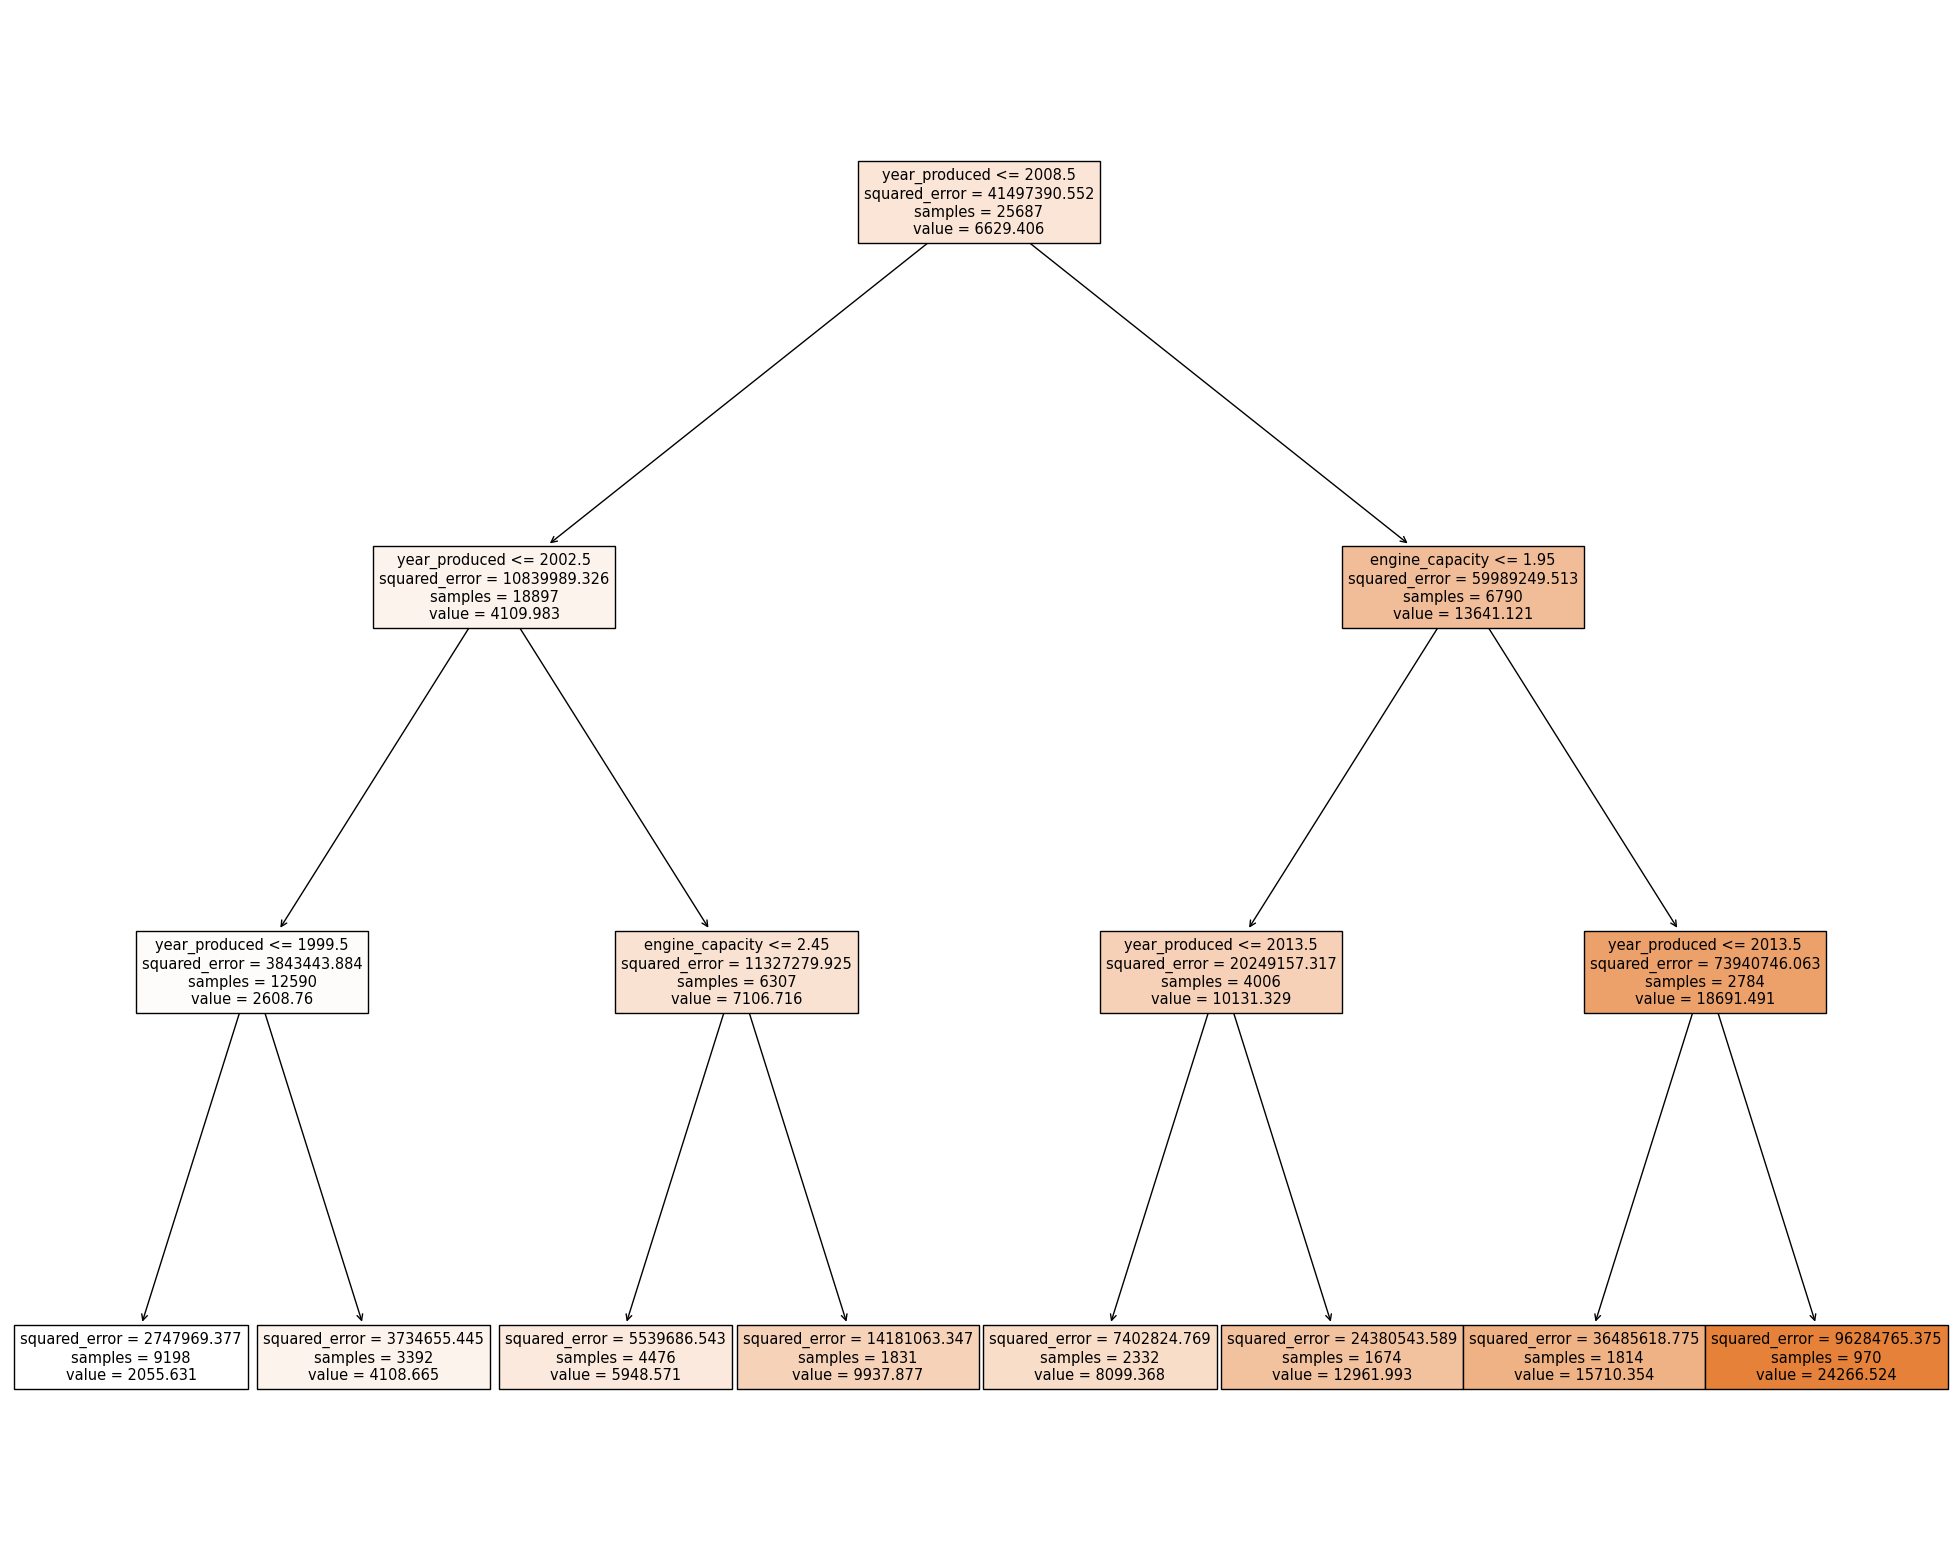

In [9]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=features, filled=True)

In [10]:
regr = GridSearchCV(DecisionTreeRegressor(),
                                            {
                                            'criterion': ["squared_error", "friedman_mse", "absolute_error"],
                                            'max_depth': np.array(range(1, 2*X_train.shape[1]+1)),
                                            },
                                            cv=2,
                                            n_jobs=3,
                                            ).fit(X_train[0:10000], y_train[0:10000])

In [11]:
regr.best_params_

{'criterion': 'absolute_error', 'max_depth': 6}

In [12]:
X_test.shape

(12844, 29)

In [13]:
y_pred = regr.predict(X_test[0:10000])

In [14]:
print(f'MAE: {mean_absolute_error(y_test[0:10000], y_pred)}')
print(f'MSE: {mean_squared_error(y_test[0:10000], y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test[0:10000], y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test[0:10000], y_pred)}')
print(f'R^2: {regr.score(X_test[0:10000], y_test[0:10000])}')

MAE: 1622.0541105
MSE: 7576184.582824167
RMSE: 2752.486981408662
MAPE: 1.2092030505367435
R^2: 0.81210406657928
